In [1]:
from metrics.wallet.dataframe.builder import Analysis
from metrics.wallet.figure.static_figure import LINE_STYLES, DEFAULT_COLORS

In [2]:
# An optional function to precise if an experiment is a success or not
def is_success(x):
    success_status = {'complete'}
    success_results = {'SAT-VERIFIED', 'UNSAT'}
    success_verifier = {'--', 'UNSAT-VERIFIED'}

    status = x['status'] in success_status
    results = x['result'] in success_results
    verifier = x['verifier result'] in success_verifier
    
    return status and results and verifier

In [3]:
# Build the Analysis
my_analysis = Analysis(input_file='input/sat2019.yml', is_success=is_success)

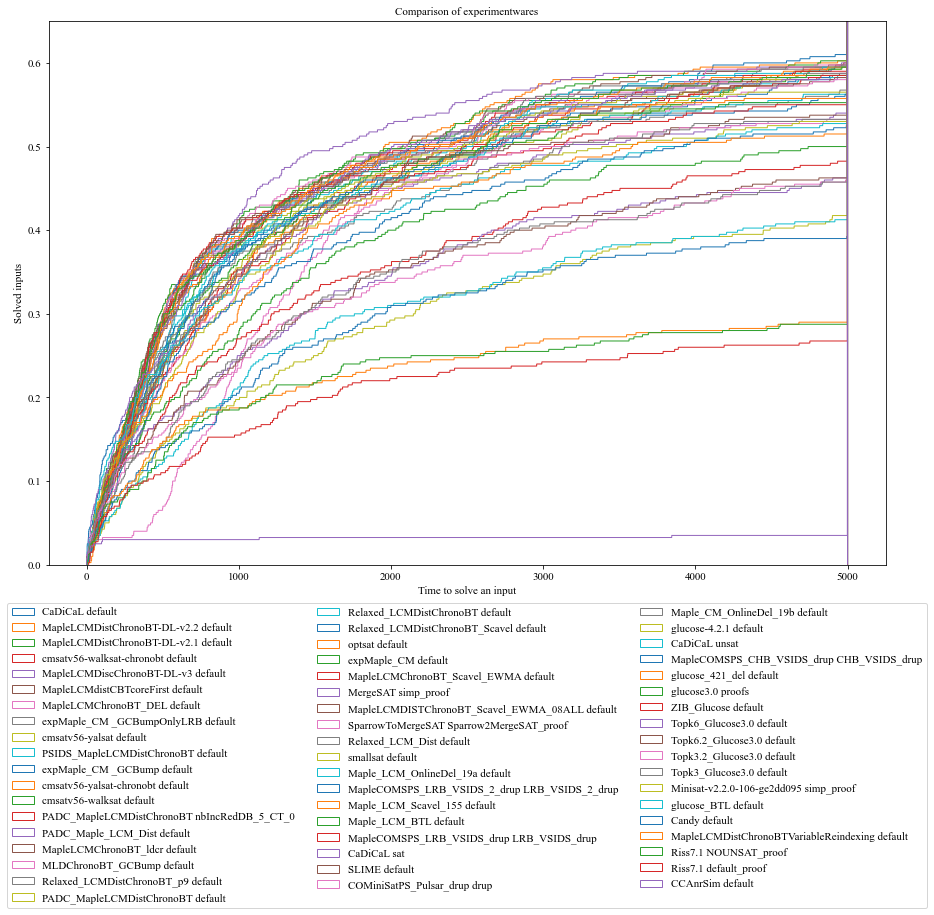

In [4]:
my_analysis.get_cdf( # CDF = Cumulative distributive Function
    cdf_col='cpu_time', 
    
    output='output/cdf.pdf', # output path or None
    figsize=(15,10),         # size of the figure to output (inch)
    
    color_map=None, 
    style_map=None,
    xp_ware_name_map=None, # a map to rename experimentwares
    
    # font properties
    font_name='Times New Roman',
    font_size=11,
    font_color='#000000',
    latex_writing=False, # if True, permits to write in latex mode (make attention to some characters)
    
    logx=False, # log scale to x-axis
    logy=False, # log scale to y-axis
    
    # set the limit of axis, or -1 to take the default value of matplotlib
    x_min=-1,
    y_min=-1,
    x_max=-1,
    y_max=.65,
    
    # matplotlib legend location
    legend_location="upper center",
    bbox_to_anchor=(0.5, -0.06),
    ncol_legend=3,
)

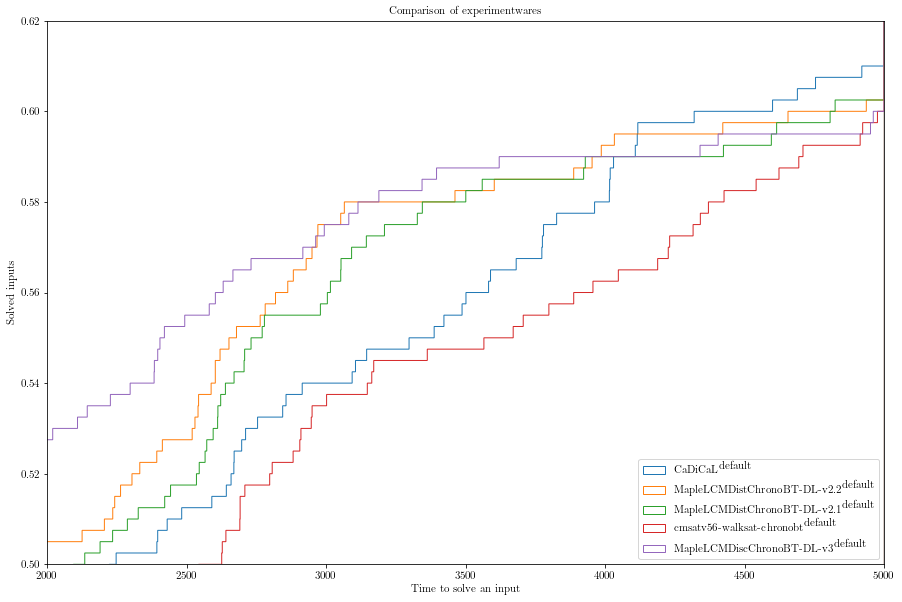

In [5]:
subset = {
    'CaDiCaL default',
    'MapleLCMDistChronoBT-DL-v2.2 default',
    'MapleLCMDistChronoBT-DL-v2.1 default',
    'MapleLCMDiscChronoBT-DL-v3 default',
    'cmsatv56-walksat-chronobt default',
}

xpware_map = {
    'CaDiCaL default': r'$\textrm{CaDiCaL}^\textrm{default}$',
    'MapleLCMDistChronoBT-DL-v2.2 default': r'$\textrm{MapleLCMDistChronoBT-DL-v2.2}^\textrm{default}$',
    'MapleLCMDistChronoBT-DL-v2.1 default': r'$\textrm{MapleLCMDistChronoBT-DL-v2.1}^\textrm{default}$',
    'MapleLCMDiscChronoBT-DL-v3 default': r'$\textrm{MapleLCMDiscChronoBT-DL-v3}^\textrm{default}$',
    'cmsatv56-walksat-chronobt default': r'$\textrm{cmsatv56-walksat-chronobt}^\textrm{default}$',
}
sub_analysis = my_analysis.sub_analysis('experiment_ware', subset)

sub_analysis.get_cdf(
    cdf_col='cpu_time', 
    
    output='output/cdf.pdf', # output path or None
    figsize=(15,10),         # size of the figure to output (inch)
    
    xp_ware_name_map=xpware_map, # a map to rename experimentwares
    
    # font properties
    font_name='Times New Roman',
    font_size=11,
    font_color='#000000',
    latex_writing=True, # if True, permits to write in latex mode (make attention to some characters)
    
    logx=False, # log scale to x-axis
    logy=False, # log scale to y-axis
    
    # set the limit of axis, or -1 to take the default value of matplotlib
    x_min=2000,
    y_min=.5,
    x_max=5000,
    y_max=.62,
    
    # matplotlib legend location
    legend_location='lower right',
    bbox_to_anchor=None,
    ncol_legend=1,
)